# Basic Multi-Path tests

Runs the following multi-path tests with MP-QUIC:
* Download of 2MB file using a single path
* Download of 2MB using multi-path with a RTT server scheduler
* Download of 2MB using multi-path with a Random server scheduler

(it takes some time, >7000 seconds in my iMAC)

In [1]:
!cd /App/mininettest && python mpTest.py

*** Error setting resource limits. Mininet's performance may be affected.
...
----------------------------------------------------------------------
Ran 3 tests in 2345.598s

OK


In [2]:
!ls -lrta /App/output/

total 32
drwxrwxr-x  2 root root 4096 Dec 17 12:08 thesis_output
-rw-rw-r--  1 root root   29 Dec 17 12:08 README.md
-rw-rw-r--  1 root root 2902 Dec 17 12:08 example.txt
-rw-r--r--  1 root root 2543 Dec 18 14:52 results-mp-quic-rtt-sch-2018-12-18-14:52:37.497112
drwxr-xr-x 11 root root 4096 Dec 18 14:52 ..
-rw-r--r--  1 root root 2543 Dec 18 15:02 results-mp-quic-random-sch-2018-12-18-15:02:55.587924
drwxrwxr-x  3 root root 4096 Dec 18 15:21 .
-rw-r--r--  1 root root 2543 Dec 18 15:21 results-mp-quic-single-sch-2018-12-18-15:21:19.512026


In [3]:
import pandas

single = pandas.read_csv("/App/output/results-mp-quic-single-sch-2018-12-18-15:21:19.512026")
srtt = pandas.read_csv("/App/output/results-mp-quic-rtt-sch-2018-12-18-14:52:37.497112")
srandom = pandas.read_csv("/App/output/results-mp-quic-random-sch-2018-12-18-15:02:55.587924")

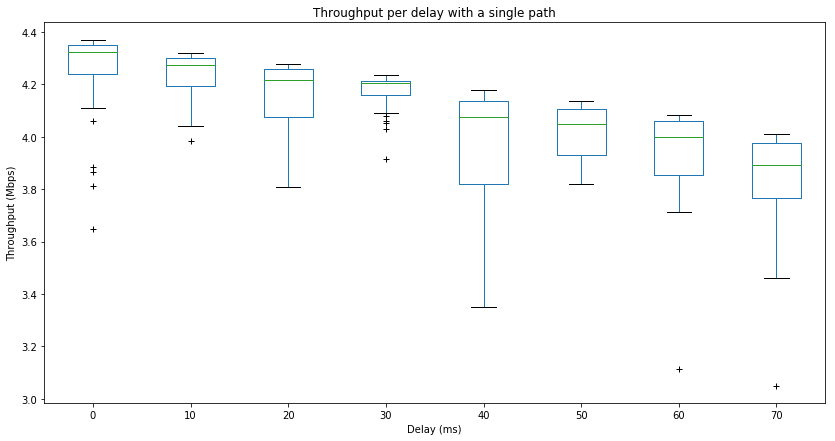

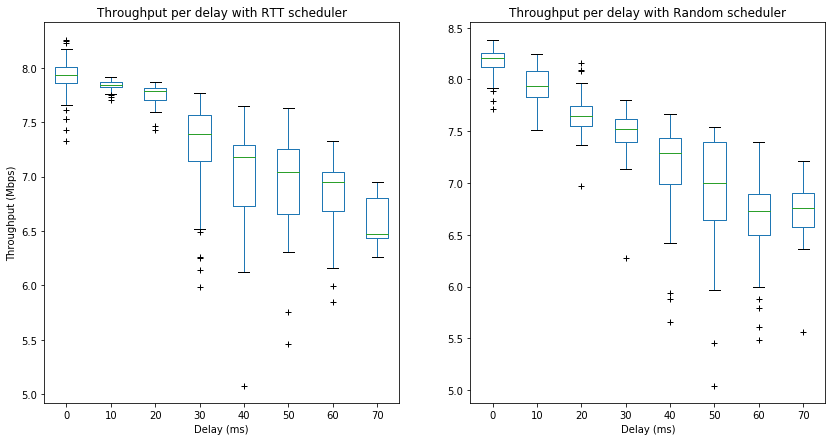

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(14, 7)

(2*8 / single).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with a single path")

fig, axes = plt.subplots(nrows=1, ncols=2)

(2*8 / srtt).plot.box(sym='+', ax=axes[0])
axes[0].set_ylabel("Throughput (Mbps)")
axes[0].set_xlabel("Delay (ms)")
axes[0].set_title("Throughput per delay with RTT scheduler")


(2*8 / srandom).plot.box(sym='+', ax=axes[1])
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with Random scheduler")



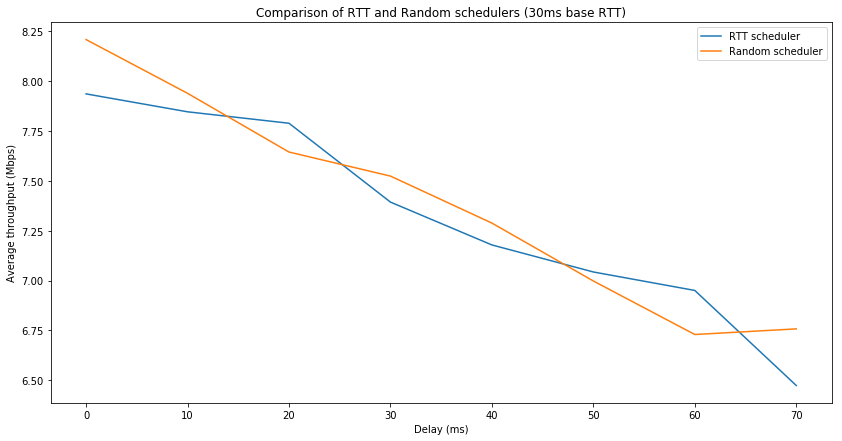

In [7]:
from IPython.core.pylabtools import figsize
figsize(14, 7)

plt.ylabel("Average throughput (Mbps)")
plt.xlabel("Delay (ms)")

average_srtt = (2*8/srtt).median()
average_srandom = (2*8/srandom).median()

plt.plot(average_srtt.index, average_srtt, label="RTT scheduler")
plt.plot(average_srandom.index, average_srandom, label="Random scheduler")

plt.legend()
plt.title("Comparison of RTT and Random schedulers (30ms base RTT)")
